<ipython-input-6-0f628d0912fa>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Day'] = df1['Day'].apply(removal)
<ipython-input-6-0f628d0912fa>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Day'] = df2['Day'].apply(removal)
<ipython-input-6-0f628d0912fa>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_

<IPython.core.display.Javascript object>


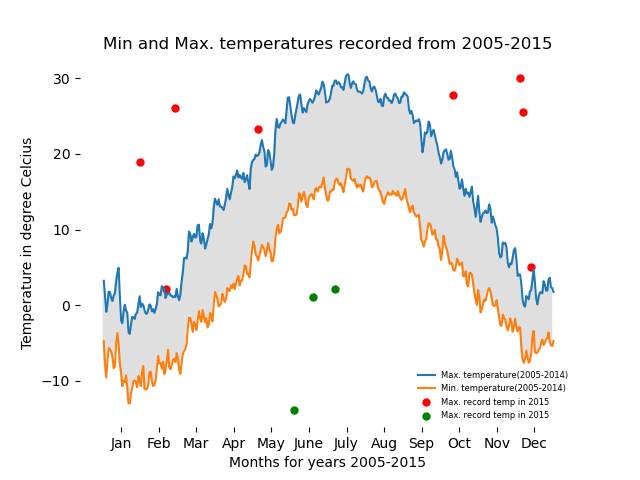

In [6]:
##load required libraries
import pandas as pd
import re
import numpy as np

%matplotlib notebook
import matplotlib as mlb
import matplotlib.pyplot as plt

##reading CSV file
df = pd.read_csv('./Downloads/my_dataset.csv')
df = df[df['Date'] < '2015']
##df = df.set_index('ID')
##df = df.reset_index()

df['Date'] = pd.to_datetime(df.Date, format='%Y-%m-%d')   ##convert to date-time format
df['Day']=df['Date'].dt.dayofyear     ##convert date to day of year
df = df.set_index('Date')

df = df[~df.index.astype(str).str.endswith('02-29')]    ##taking leap year dates out 
df = df.sort_values(by ='Day')
df = df.reset_index()


df1 = df[df['Date'].astype(str).str.startswith('2008')]    ##this block converts the leap years dates to day of year
def removal(row):
    return row - 1 if row > 60 else row
df1['Day'] = df1['Day'].apply(removal)
df2 = df[df['Date'].astype(str).str.startswith('2012')]
df2['Day'] = df2['Day'].apply(removal)

df3 = pd.concat([df1, df2], ignore_index=True, sort=False)   ##concatinating the above years to one dataframe
   
df = df[~df['Date'].astype(str).str.startswith('2008')]     ##taking out leap years out from original dataframe
df = df[~df['Date'].astype(str).str.startswith('2012')]


main = pd.concat([df, df3], ignore_index=True, sort=False)  ##putting together everything

main1 = main[main['Element'] == 'TMAX']      ##seperating min. and max. temperatures
main2 = main[main['Element'] == 'TMIN']

def convert(row):
    return row/10                                                ## this block of code groups the data by day and gives out
main1 = main1.groupby("Day").agg({"Data_Value" :(np.mean)})       ## mean of max and min values 
main1['Data_Value'] = main1['Data_Value'].apply(convert)
main2 = main2.groupby("Day").agg({"Data_Value" :(np.mean)})
main2['Data_Value'] = main2['Data_Value'].apply(convert)

##All the above steps repeated for the year 2015

df = pd.read_csv('./Downloads/my_dataset.csv')
DF = df[df['Date'] >='2015']
                 
DF['Date'] = pd.to_datetime(DF.Date, format='%Y-%m-%d')
DF['Day']=DF['Date'].dt.dayofyear
                 
DF = DF.sort_values(by = 'Day')
DF["Data_Value"] = DF['Data_Value'].apply(convert)
                 
MAIN1 = DF[DF['Element'] == 'TMAX']
MAIN2 = DF[DF['Element'] == 'TMIN']

                 
##MAIN1 = MAIN1.groupby("Day").agg({"Data_Value" :(np.mean)})
##MAIN2 = MAIN2.groupby("Day").agg({"Data_Value" :(np.mean)})
                 
x = pd.merge(main1, MAIN1 , how='inner' , left_index=True , right_index=True)
y = pd.merge(main2 , MAIN2 , how='inner' , left_index=True , right_index=True)

x['que'] = np.where((x['Data_Value_y'] > x['Data_Value_x'])
                     , x['Data_Value_y'], np.nan)
                 
y['que'] = np.where((y['Data_Value_y'] < y['Data_Value_x'])
                     , y['Data_Value_y'], np.nan)

x = x.drop(columns=['Data_Value_x' , 'Data_Value_y'])
y = y.drop(columns=['Data_Value_x' , 'Data_Value_y'])
                 
plt.figure()

plt.plot(main1.index, main1['Data_Value'].values ,'-', main2.index, main2['Data_Value'].values ,'-')
ax = plt.gca()

plt.xticks(np.linspace(15,380,13)[:-1],('Jan', 'Feb' , 'Mar' , 'Apr' , 'May' , 'June', 'July', 'Aug' , 'Sep', 'Oct', 'Nov', 'Dec'))
plt.ylabel('Temperature in degree Celcius')
plt.title('Min and Max. temperatures recorded from 2005-2015')
plt.xlabel('Months for years 2005-2015')
plt.scatter(x.index, x['que'].values, s=25, c='red', label='Max. record temp in 2015')
plt.scatter(y.index, y['que'].values , s=25, c='green', label='Max. record temp in 2015')
plt.legend(['Max. temperature(2005-2014)' , 
            'Min. temperature(2005-2014)' , 
            'Max. record temp in 2015' , 
            'Max. record temp in 2015'], frameon = False , loc=4 , prop={'size': 6})

plt.gca().fill_between(range(len(main1['Data_Value'].values)), 
                       main1['Data_Value'].values, main2['Data_Value'].values, 
                       facecolor='grey', 
                       alpha=0.25)
plt.box(False)